In [158]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string

In [159]:
df = pd.read_csv('spam.csv' , encoding = 'latin-1')

In [160]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [161]:
df.shape

(5572, 5)

In [162]:
## we perform these  steps 
#1. data cleaning 
#EDa 
# text preporcessing 
#model building 
# evaluation 
#website 
# Deployment 


In [163]:
# 1. Data cleaning 
df.drop( columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)


In [164]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [165]:
df.sample(3)

,v1,v2
278,ham,Just sent it. So what type of food do you like?
40,ham,Pls go ahead with watts. I just wanted to be s...
120,spam,URGENT! Your Mobile No. was awarded å£2000 Bon...


In [166]:
#rename 
df.rename(columns = {'v1' :'target','v2':'text'}, inplace = True)

In [167]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [168]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [169]:
df['target']=encoder.fit_transform(df['target'])

In [170]:
df   #0 = ham , 1 = spam

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [171]:
# check missing value 

df.isna().sum()

target    0
text      0
dtype: int64

In [172]:
df.duplicated().sum()

403

In [173]:
df.drop_duplicates(keep = 'first' , inplace = True)

In [174]:
df.shape

(5169, 2)

In [175]:
df.duplicated().sum()

0

# EDA

In [176]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [177]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [178]:
import matplotlib.pyplot as plt 

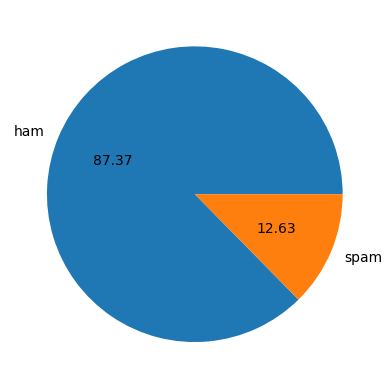

In [179]:
plt.pie(df['target'].value_counts() , labels = ['ham', 'spam'] ,autopct = '%0.2f')
plt.show()

In [180]:
import nltk

In [181]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [182]:
df['num_character']=df['text'].apply(len)

In [183]:
df

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [184]:
df['num_word']=df['text'].apply( lambda x: nltk.word_tokenize(x)).apply(len)

In [185]:
df['num_sentence']=df['text'].apply( lambda x: nltk.sent_tokenize(x)).apply(len)

In [186]:
df

,target,text,num_character,num_word,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [187]:
df[['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [188]:
df[df['target'] == 0 ][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [189]:
df[df['target'] == 1 ][['num_character', 'num_word', 'num_sentence']].describe()

,num_character,num_word,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [190]:
import seaborn as sns

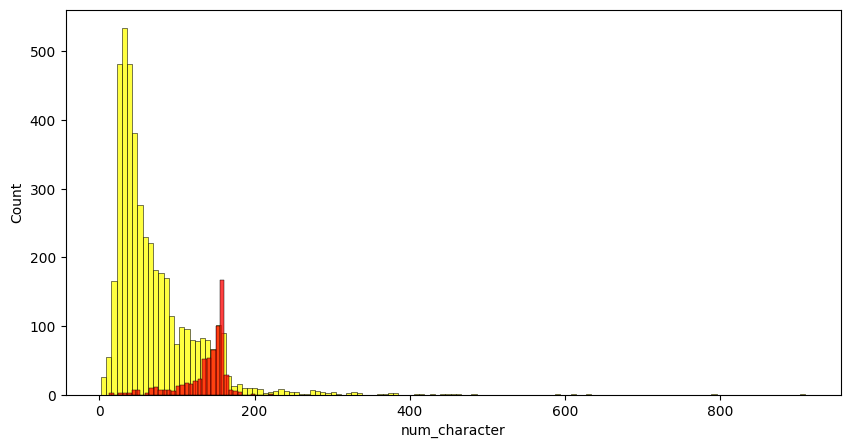

In [191]:

plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==0]['num_character'], color = 'yellow')
sns.histplot(df[df['target']==1]['num_character'] , color = 'red')
plt.show()

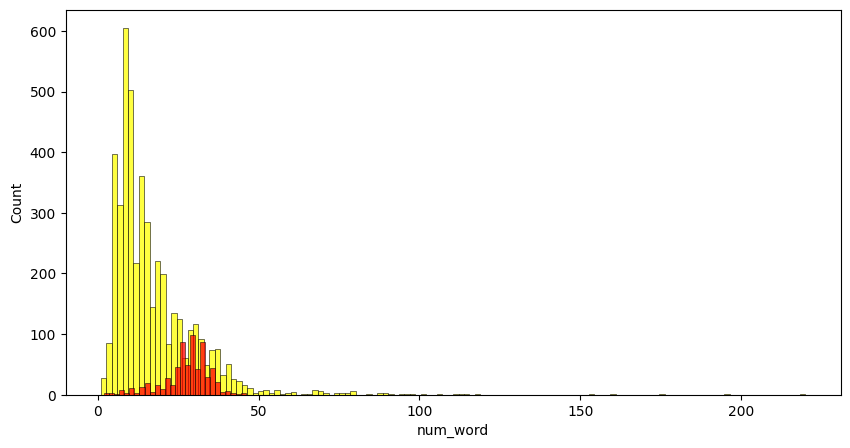

In [192]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['target']==0]['num_word'], color = 'yellow')
sns.histplot(df[df['target']==1]['num_word'] , color = 'red')
plt.show()

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


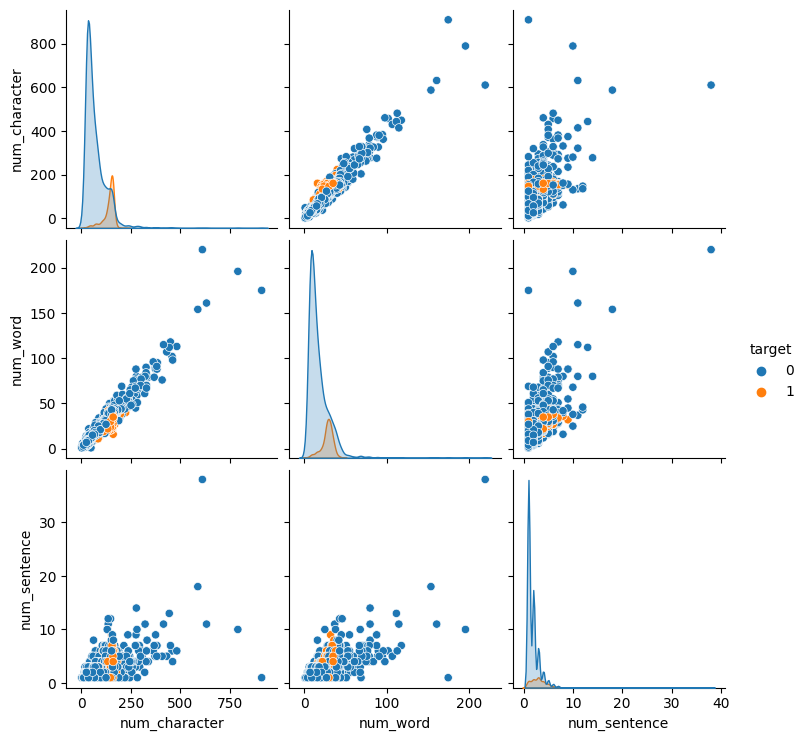

In [193]:
sns.pairplot(df,hue= ('target'))
plt.show()

<Axes: >

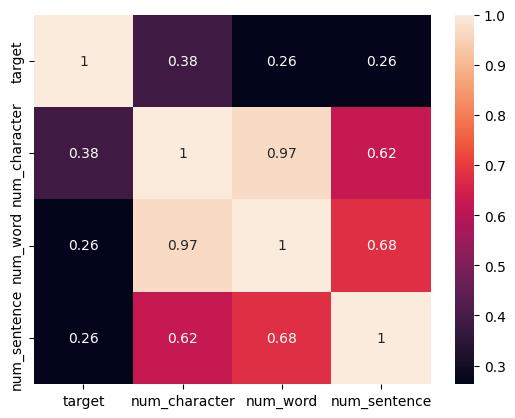

In [194]:
#to see correlation matrix 
df_numeric = df.select_dtypes(include=[np.number]) 
sns.heatmap(df_numeric.corr() , annot = True)

In [195]:
#data preprocess 
#lower case 
#tokenization 
#remove special character 
#remove stopwords 
#stemming 


In [196]:
import string 
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    
    text= nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
            
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and  i not in string.punctuation:
            y.append(i)
            
    text = y[:]       
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    
    return " ".join(y)

In [197]:
transform_text('HI Somu MY sely  Ak?!')

'hi somu seli ak'

In [198]:
from nltk.corpus import stopwords 


In [199]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [200]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [201]:
ps.stem('danceing')

'danc'

In [202]:
df['transform_text']=df['text'].apply(transform_text)

In [203]:
df#

,target,text,num_character,num_word,num_sentence,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [204]:
#word cloud

from wordcloud import WordCloud
wc= WordCloud(width = 700 , height = 700 , min_font_size = 10 ,background_color = 'yellow')

In [205]:
spam_wc = wc.generate(df[df['target'] == 1]['transform_text'].str.cat(sep = ' '))

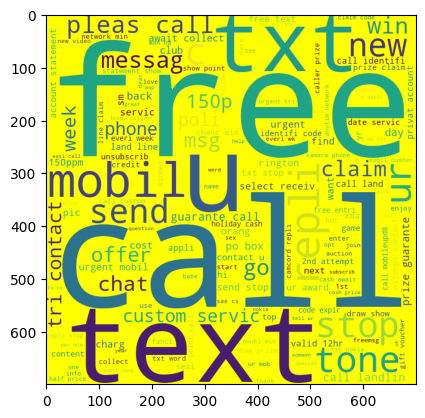

In [206]:
plt.imshow(spam_wc)

In [207]:
#word cloud for ham 

ham_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep = ' '))

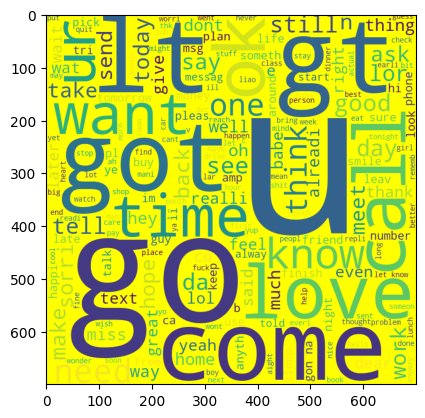

In [208]:
plt.imshow(ham_wc)

In [209]:
#top 50 words 

spam_corpus = []
for msg in df[df['target'] == 1]['transform_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    
    

In [210]:
len(spam_corpus)

9939

In [211]:
from collections import Counter
pd.DataFrame(Counter(spam_corpus).most_common(50))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [212]:
ham_corpus = []
for msg in df[df['target'] == 0]['transform_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
    

In [213]:
len(ham_corpus)

35404

In [214]:
pd.DataFrame(Counter(ham_corpus).most_common(50))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


# Model Building 


In [215]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [216]:
X = tfidf.fit_transform(df['transform_text']).toarray()

In [217]:
X.shape

(5169, 6708)

In [218]:
y = df['target'].values

In [219]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
X_train, X_test , y_train , y_test = train_test_split(X,y , test_size = 0.2 , random_state = 2 )

In [222]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB ,BernoulliNB
from sklearn.metrics import accuracy_score ,confusion_matrix, precision_score 

In [223]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [224]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8762088974854932
[[793 103]
 [ 25 113]]
0.5231481481481481


In [225]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [226]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier , ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [228]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [229]:
df['transform_text'][4532]

'gr8 new servic live sex video chat mob see sexiest dirtiest girl live ur phone 4 detail text horni 89070 cancel send stop 89070'

In [230]:
df.sample(10)


,target,text,num_character,num_word,num_sentence,transform_text
150,0,The wine is flowing and i'm i have nevering..,45,11,1,wine flow never
1454,0,Can Ì_ all decide faster cos my sis going home...,53,12,1,decid faster co si go home liao
4665,0,Not..tel software name..,24,6,1,tel softwar name
419,1,Send a logo 2 ur lover - 2 names joined by a h...,159,34,3,send logo 2 ur lover 2 name join heart txt lov...
5018,0,Great! How is the office today?,31,8,2,great offic today
1273,1,network operator. The service is free. For T &...,66,15,3,network oper servic free c visit
4004,0,", ow u dey.i paid 60,400thousad.i told u woul...",55,11,1,ow u paid told u would call
655,0,Tell them the drug dealer's getting impatient,45,8,1,tell drug dealer get impati
956,0,"Love isn't a decision, it's a feeling. If we c...",126,31,2,love decis feel could decid love life would mu...
1330,0,"Aight no rush, I'll ask jay",27,8,1,aight rush ask jay
